# EDA - Stakeholder Analyses


In [85]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime, date, time, timedelta


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [86]:
# import cleaned data
df_kc_clean = pd.read_csv('data/king_county_house_clean_dataset.csv')

# disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1) 

## Stakeholder Requirement
- budget assumption: lower 15 percent of price/sqm living area
- location: social neighborhood, family friendly
- five children: 6 bedrooms or >= 4 bedrooms with at least 150 sqm living area 
- fair condition, >= 3
- good construction, >4


American Crowding Index: (WHO Housing and health guidelines)

Overcrowding occurs if there are more than three people per habitable room (88).
American Crowding Index
Crowding occurs if there is more than one person per room; severe crowding occurs if there are more than 1.5
persons per room (excluding bathrooms, balconies, porches, foyers, hall-ways and half-rooms).

Assumption: Requirements can be fulfilled with at least a fair chance if the were at least 100 listing with this criteria in the data set.

In [87]:
#lowest 15% of the price range
np.percentile(df_kc_clean['price_sqm_living'], 15)

1717.0

In [88]:
df_kc_low15 = df_kc_clean.query('price_sqm_living <= 1717')


In [89]:
# save affordable df as .csv
df_kc_low15.to_csv('data/king_county_house_affordable_dataset.csv', index=False)

In [90]:
df_kc_low15.describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000
mean,4572224714.859,299371.183,3.649,2.179,205.212,1256.929,1.470,3.323,2.912,1977.575,98061.711,6.617,0.048,1465.585,519.446,716.169
std,2852927069.005,102714.048,0.875,0.680,68.476,2928.303,0.490,0.585,0.350,23.494,57.616,3.217,0.215,181.735,749.606,227.700
min,1000102.000,78000.000,1.000,0.500,53.000,100.000,1.000,1.000,1.000,1900.000,98001.000,1.000,0.000,945.000,134.000,25.000
25%,2113700271.250,235000.000,3.000,1.750,160.000,594.750,1.000,3.000,3.000,1962.000,98023.000,4.000,0.000,1349.000,335.000,581.000
50%,3922150171.500,286975.000,4.000,2.250,196.000,749.000,1.000,3.000,3.000,1979.000,98038.000,7.000,0.000,1502.000,387.000,725.000
75%,7299600755.000,350000.000,4.000,2.500,239.000,971.000,2.000,4.000,3.000,1997.000,98092.000,9.000,0.000,1615.000,473.000,865.000
max,9835801000.000,1140000.000,9.000,7.500,694.000,78345.000,3.000,5.000,5.000,2015.000,98198.000,12.000,1.000,1717.000,19925.000,1408.000


In [103]:
#starting with the perfect houses, there are no results
df_kc_low15.query('social_ngh == 1 and bedrooms >= 6 and construction >= 4 and condition >= 4').sort_values('price').shape

(0, 17)

In [104]:
#alternative square meter instead of bedrooms do not improve things much
df_kc_low15.query('social_ngh == 1 and sqm_living >= 120 and bedrooms >= 4 and construction >= 4 and condition >= 4').sort_values('price').shape

(0, 17)

I want to look at the distribution of the criteria variables to see what I need to relax on to get more listings:

reducing the bedrooms to at least 3 was a good idea, but not sufficient. Since this is the minimum required bedrooms, we need to look for other factors

there are only limited listing with construction rates above 3, so having this criteria reduce the findings a lot. construction should be set to at least fair (>= 3)

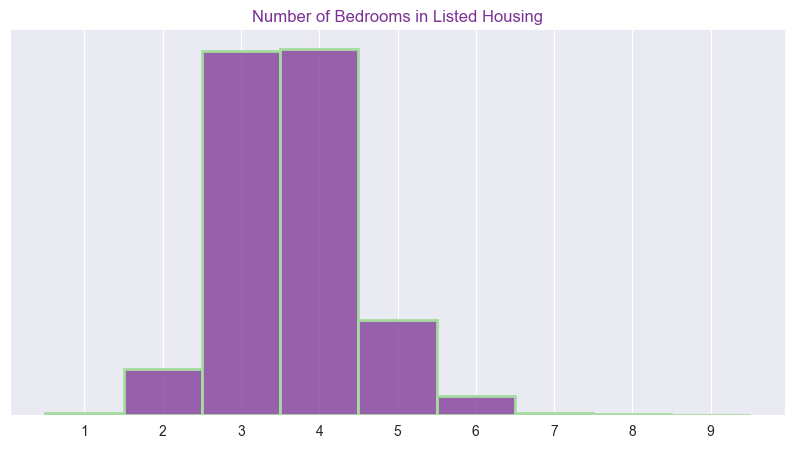

In [110]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ax = ax, data = df_kc_low15, x='bedrooms', edgecolor='#a6dba0', linewidth=2, binwidth=1, color='#7b3294', discrete=True)
#df_kc_low15.hist(ax=ax, column='bedrooms', edgecolor='#a6dba0', linewidth=2, color='#7b3294', discrete=True)

sns.set_style("darkgrid")
sns.despine()

ax.set_title('Number of Bedrooms in Listed Housing', color='#7b3294')
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.yticks([]);

plt.savefig("bedrooms_distribution.jpg")

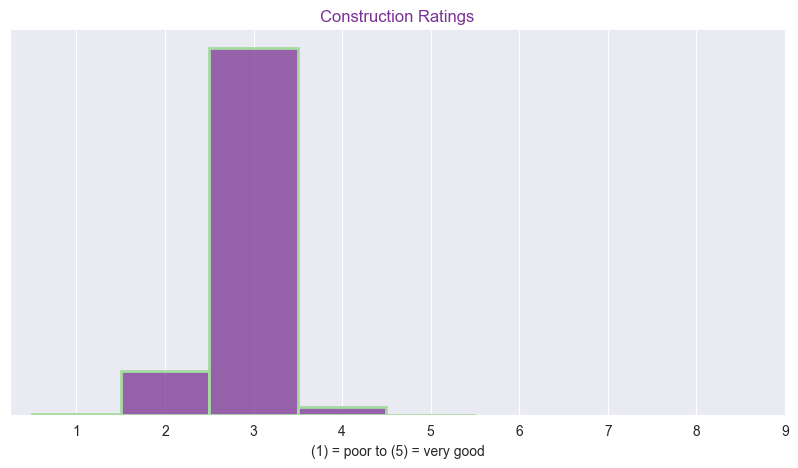

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ax = ax, data = df_kc_low15, x='construction', edgecolor='#a6dba0', linewidth=2, binwidth=1, color='#7b3294', discrete=True)
#df_kc_low15.hist(ax=ax, column='bedrooms', edgecolor='#a6dba0', linewidth=2, color='#7b3294', discrete=True)

sns.set_style("darkgrid")
sns.despine()

ax.set_title('Construction Ratings', color='#7b3294')
ax.set_ylabel('')
ax.set_xlabel('(1) = poor to (5) = very good')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.yticks([]);

plt.savefig("construction_distribution.jpg")

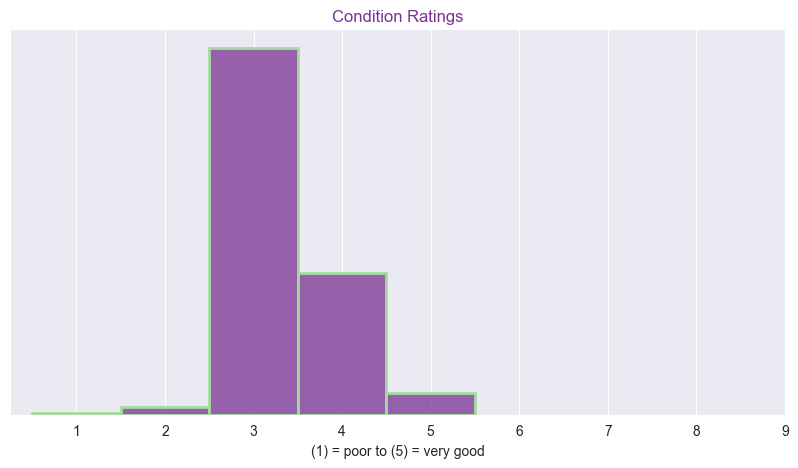

In [111]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ax = ax, data = df_kc_low15, x='condition', edgecolor='#a6dba0', linewidth=2, binwidth=1, color='#7b3294', discrete=True)
#df_kc_low15.hist(ax=ax, column='bedrooms', edgecolor='#a6dba0', linewidth=2, color='#7b3294', discrete=True)

sns.set_style("darkgrid")
sns.despine()

ax.set_title('Condition Ratings', color='#7b3294')
ax.set_ylabel('')
ax.set_xlabel('(1) = poor to (5) = very good')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.yticks([]);

plt.savefig("condition_distribution.jpg")

most listing are in fair condition, so reducing this criteria makes a lot of sense

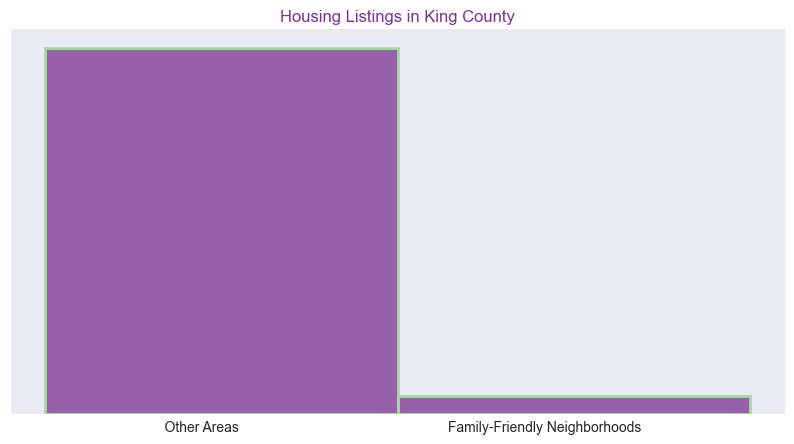

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ax = ax, data = df_kc_low15, x='social_ngh', edgecolor='#a6dba0', linewidth=2, binwidth=.8,bins=2, color='#7b3294', discrete=True)

sns.set_style("darkgrid")
sns.despine()

ax.set_title('Housing Listings in King County', color='#7b3294')
ax.set_ylabel('')
ax.set_xlabel('   Other Areas                                                      Family-Friendly Neighborhoods')
plt.xticks([])
plt.yticks([]);
plt.savefig("social_ngh_distribution")

location, location location: as expected, the good neighborhood limits the chances greatly, a last resort would be to move to a less desired neighborhood 

In [96]:
#starting with the perfect houses, there are no results
df_kc_low15.query('social_ngh == 1 and bedrooms >= 6 and construction >= 4 and condition >= 3').sort_values('price').shape

(0, 17)

In [112]:
#alternative square meter instead of bedrooms do not improve things much
df_kc_low15.query('social_ngh == 1 and sqm_living >= 120 and bedrooms >= 4 and construction >= 4 and condition >= 4').sort_values('price').shape

(0, 17)

## Reducing Stakeholder Requirements
- as seen in the distributions, reducing to 4 bedrooms is a good idea, but was no enough to yield at least a sufficient amount of available housing

In [113]:
df_kc_low15.query('social_ngh == 1 and sqm_living >= 120 and bedrooms >= 4 and construction >= 4 and condition >= 3').sort_values('price').shape

(3, 17)

In [99]:
df_kc_low15.query('social_ngh == 1 and bedrooms >= 6 and construction >= 3 and condition >= 3').sort_values('price').shape

(11, 17)

In [114]:
# the only way to achieve a sufficient amount of listing in the past:
df_kc_low15.query('social_ngh == 1 and sqm_living >= 120 and bedrooms >= 4 and construction >= 3 and condition >= 3').sort_values('price').shape

(69, 17)

In [101]:
df_kc_low15.query('social_ngh == 1 and sqm_living >= 120 and bedrooms >= 3 and construction >= 3 and condition >= 3').sort_values('price').shape

(115, 17)

## Feasible Requirements
- social neighborhood
- 120 square meter living and at least four bedrooms
- fair condition
- fair construction

- searching outside of desired neighborhood would increase the changes significantly:


In [102]:
df_kc_low15.query('social_ngh == 0 and sqm_living >= 120 and bedrooms >= 3 and construction >= 3 and condition >= 3').sort_values('price').shape

(2610, 17)